In [1]:
# Columns

# Unfinished : 1 = product not finished __________________ 0 = product finished 
# Finished : 0 = product not finished __________________ 1 = product finished 

In [15]:
# Libraries

#_________DATA MANIPULATION_____________#

import pandas as pd
import numpy as np

#________DATA VISUALIZATION_____________#

import seaborn as sns

#________ML - LIBRARIES_________________#

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [3]:
data = pd.read_csv('projects.csv')

In [4]:
data.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [5]:
swap_values = {   
    0 : 1,
    1 : 0
}

data['finished'] = data['unfinished'].map(swap_values) # The map apply'swap_values' in the column data['unfinished']

In [6]:
data

unfinished  expected_hours  price  finished
0              1              26    192         0
1              1              88   9015         0
2              1              89   2577         0
3              1              42    275         0
4              1              39    170         0
...          ...             ...    ...       ...
2152           0              80   7518         1
2153           1              52   1332         0
2154           0              40    473         1
2155           0              75   5324         1
2156           1              37    377         0

[2157 rows x 4 columns]

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

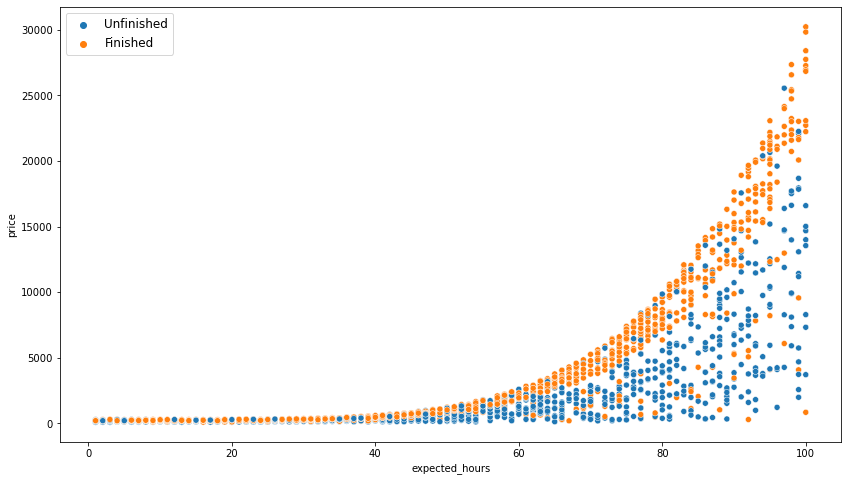

In [7]:
ax = sns.scatterplot(data=data, 
                     x ='expected_hours', 
                     y = 'price',
                     hue = 'finished')


ax.figure.set_size_inches(14, 8) 

# Configurações da legenda do gráfico 
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Unfinished', 'Finished'], fontsize=12)

ax

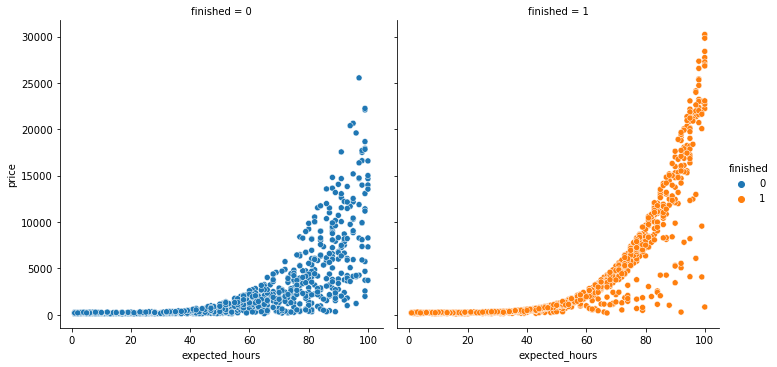

In [8]:
ax = sns.relplot(data=data, 
                     x ='expected_hours', 
                     y = 'price',
                     hue = 'finished',
                     col = 'finished')

In [9]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [12]:
seed = 20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed, stratify = y,test_size = 0.25)

In [13]:
model = LinearSVC()
model.fit(x_train, y_train) 
predict = model.predict(x_test) 

accuracy = accuracy_score(y_test, predict) * 100
print(f'The accuracy is {accuracy : .2f} %')

The accuracy is  54.26 %


C:\Users\Gabri\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [17]:
random_predicts = np.ones(540)
accuracy_rp = accuracy_score(y_test, random_predicts) * 100
print(f'The accuracy is {accuracy_rp : .2f} %')

The accuracy is  52.59 %
